In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append("/content/drive/My Drive/Pipeline")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#importでの実行

In [2]:
from opencv.color_cvt import read_img, chromakey, cut_roi, roi_cvt, roi_to_img,color_plot,median_plot_2,dropper, layer_to_img,hsv_rotation
import matplotlib.pyplot as plt

透過画像 (572, 696, 4)


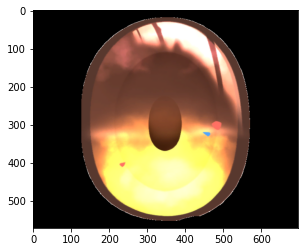

In [3]:
# イメージパス
image_path = "右目.png"
# RGBの取得とalphaチャンネルの取得
img, alpha_ch = read_img(image_path)

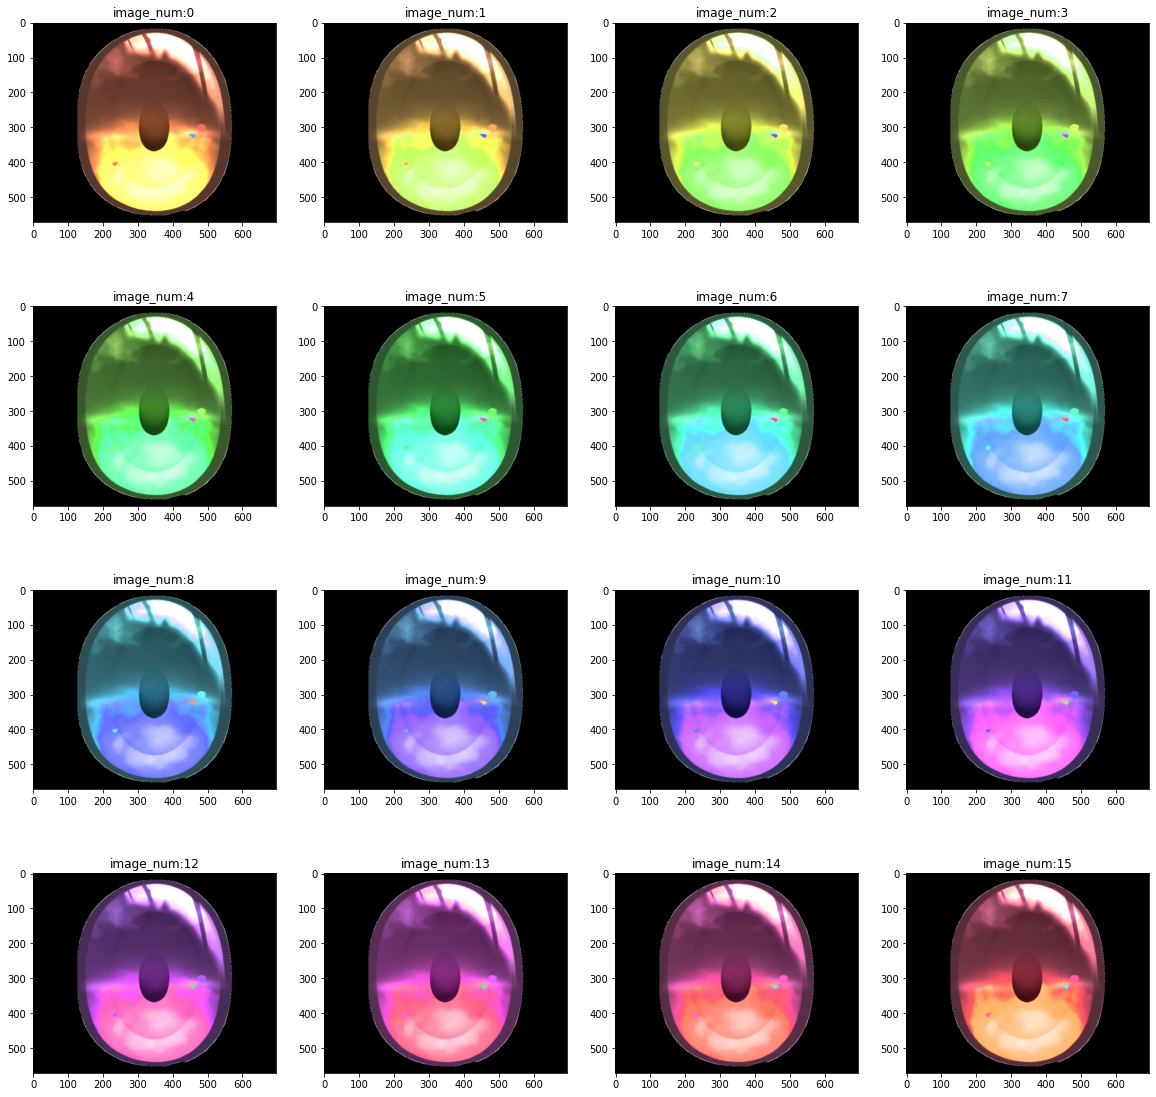

In [4]:
image_list = hsv_rotation(img,alpha_ch,get_num=10,x=4,y=4)

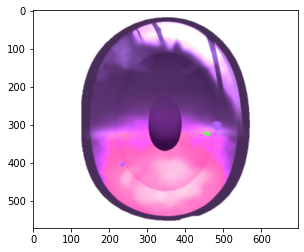

In [6]:
get_image = image_list[12]
plt.imshow(get_image)

In [61]:
#保存
output_path = "ad.png"
cv2.imwrite(output_path,get_image)

True

# HSV回転
https://tzmi.hatenablog.com/entry/2020/01/07/230036

In [20]:
import numpy as np
import cv2
from skimage import data
from skimage import io as skio
from matplotlib import pyplot as plt

def hsv_rotation(img,get_num=0):
  h,w,c = img.shape
  img = img[:,:h]
  img = cv2.resize(img, (256, 256))
  h,w,c = img.shape
  m = 4
  mm = 4**2

  imgs = []
  for i in range(mm):
      ang = int(i*(180//mm))
      hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
      hsv = hsv.astype(np.uint16) # uint8だと255以上で不定になるので型を変更
      hsv[:,:,0] = (hsv[:,:,0]+ang)%180
      hsv = hsv.astype(np.uint8) # 型を戻す
      dst = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
      imgs.append(dst)
      if i == get_num:
        get_image = dst

  imgs = np.array(imgs)
  imgs = imgs.reshape(m,m,h,w,c)
  imgs = imgs.transpose(0,2,1,3,4)
  imgs = imgs.reshape(m*h,m*w,c)
  plt.figure(figsize=(20,20))
  plt.imshow(imgs)
  # skio.imsave('hsv.png', imgs)
  return get_image

In [21]:
img_alpha = cv2.imread(image_path,-1)
get_image = hsv_rotation(img_alpha,get_num=1)

AttributeError: ignored

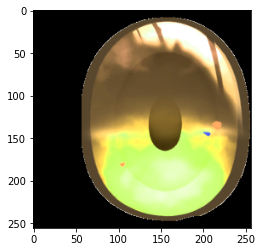

In [18]:
plt.imshow(get_image)